# Fake News Detection Classification Model

By: Doreen Mwikali

In [1]:
pip install numpy pandas sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#making required imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#Reading data into a dataframe and obtaining the shape of data and the first 5 records
#Reading the data
df=pd.read_csv("news.csv")

#Getting shape and head of the dataframe
df.shape
df.head() 

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#Getting labels from the DataFrame
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
#Splitting the dataset into training and testing set

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7) #test size is 20% and train size is 80%

In [6]:
#initializing TfidfVectorizer with stop words from the English language (most common words in a language that are to be filtered out before processing natural language data)
#and a maximum document frequency of 0.7 (terms with a higher document frequency (more than 70%) will be discarded)

#Initializing TfidVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fitting and transforming the train set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)

#transforming the test set
tfidf_test=tfidf_vectorizer.transform(x_test)


In [7]:
#Initializing PassiveAggressiveClassifier and fit it on tidf_train and y_train
#Predict on the test set from tfidfVectorizer and calculate accuracy with accuracy_score() from sklearn.metrics

#Initialize PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)

#fitting the training set into the classifier
pac.fit(tfidf_train, y_train) 

#Predicitng on the test set 
y_pred=pac.predict(tfidf_test)



In [8]:
#Calculating the accuracy score of the model
score=accuracy_score(y_test,y_pred)
print(f'Accuracy is: {round(score*100,2)}%')

Accuracy is: 92.98%


# Confusion Matrix

-Also called error Matrix.
-A table that is used in classification problems to examine where errors in the model were made.
-Rows represent the actual classes the outcomes should have been.
-Columns represent the predictions made by the model.
-Assist in model evaluation but also model monitoring and model management.


In [9]:
#Creating a confusion matrix to get the number of false and true negatives and positives

#Building the confusion matrix
confusion_matrix(y_test,y_pred, labels =['FAKE','REAL'])

array([[591,  47],
       [ 42, 587]], dtype=int64)

With an accuracy of 92.98% in the model, there are 592 true negatives, 46 false positives, 43 false negatives and 586 true positives.

In [10]:
#Creating an more interpretable visual display of the confusion matrix
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred, labels =['FAKE','REAL']))

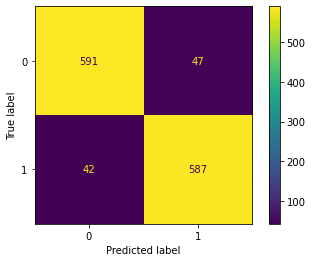

In [11]:
#visualizing the display using matplotlib
#Displaying the plot using plot() and show() functions from pyplot
cm_display.plot()
plt.show()

The Confusion Matrix created has four different quadrants:

True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)
True means that the values were accurately predicted, False means that there was an error or wrong prediction.

# Generating a classification Report
Precision: percentage of correct positives out of all postives(both true and negative).

Recall/Sensitivity/Hit rate/true postive rate: ratio of true positives to the sum of true positives and false negatives. The proportion of actual postivies that were identified correctly.

f1-score: harmonic mean of precision and recall. Measures a model's accuracy/preciseness and robustness. Max score of 1 means perfect precision and recall and a min score of 0.

In [12]:
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

